In [8]:
import pandas as pd
import numpy as np
url = 'becode_properties.csv'
chipo = pd.read_csv(url,sep = ',' )

chipo.columns

Index(['id', 'price', 'property_type', 'subproperty_type', 'region',
       'province', 'locality', 'zip_code', 'latitude', 'longitude',
       'construction_year', 'total_area_sqm', 'surface_land_sqm',
       'nbr_frontages', 'nbr_bedrooms', 'equipped_kitchen', 'fl_furnished',
       'fl_open_fire', 'fl_terrace', 'terrace_sqm', 'fl_garden', 'garden_sqm',
       'fl_swimming_pool', 'fl_floodzone', 'state_building',
       'primary_energy_consumption_sqm', 'epc', 'heating_type',
       'fl_double_glazing', 'cadastral_income'],
      dtype='object')

In [10]:
import pandas as pd
import numpy as np
url = 'becode_properties.csv'
chipo = pd.read_csv(url,sep = ',' )
# حذف ردیف‌هایی که ستون خالی دارند
chipo = chipo.dropna(subset=['total_area_sqm'])
chipo = chipo.dropna(subset=['construction_year'])
# ذخیره نتیجه در یک فایل جدید
chipo.to_csv('cleaned_file.csv', index=False)
print("فایل جدید با موفقیت ذخیره شد.")

فایل جدید با موفقیت ذخیره شد.


In [16]:

# تبدیل ستون قیمت به عدد (حذف کاراکترهای اضافی مثل , یا $)
chipo['price'] = pd.to_numeric(chipo['price'].replace('[\€,]', '', regex=True), errors='coerce')

# حذف ردیف‌هایی که مقدار قیمت ندارند
chipo = chipo.dropna(subset=['price'])

# مرتب‌سازی نزولی بر اساس ستون قیمت
chipo_sorted = chipo.sort_values(by='price', ascending=False)

# ذخیره نتیجه در فایل جدید
chipo_sorted.to_csv('cleaned_file.csv', index=False)

print("داده‌ها بر اساس قیمت به صورت نزولی مرتب و ذخیره شدند.")



داده‌ها بر اساس قیمت به صورت نزولی مرتب و ذخیره شدند.


In [15]:
url = 'cleaned_file.csv'
chipo = pd.read_csv(url,sep = ',' )
chipo['price'].head(5)

0    11450000
1     9999999
2     9300000
3     9000000
4     8500000
Name: price, dtype: int64

In [17]:
import matplotlib
import seaborn
print("Matplotlib version:", matplotlib.__version__)
print("Seaborn version:", seaborn.__version__)


Matplotlib version: 3.10.1
Seaborn version: 0.13.2


C:\Users\Behnaz\AppData\Local\Temp\ipykernel_14968\3311203176.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='region', y='count', data=region_counts, palette='Blues_r')


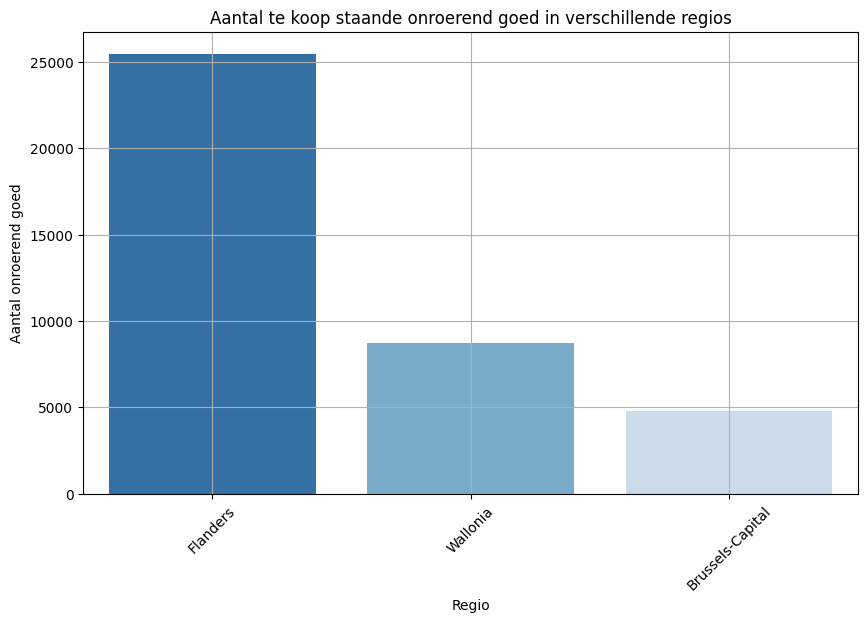

In [32]:


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# خواندن فایل CSV
df = pd.read_csv('cleaned_file.csv')

# گروه‌بندی داده‌ها بر اساس منطقه (region) و شمارش تعداد رکوردها در هر منطقه
region_counts = df['region'].value_counts().reset_index()
region_counts.columns = ['region', 'count']

# رسم نمودار میله‌ای با Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='region', y='count', data=region_counts, palette='Blues_r')
plt.title('Aantal te koop staande onroerend goed in verschillende regios')
plt.xlabel('Regio')
plt.ylabel('Aantal onroerend goed')
plt.xticks(rotation=45)  # چرخاندن برچسب‌های محور افقی برای خوانایی بهتر
plt.grid(True)
plt.show()



C:\Users\Behnaz\AppData\Local\Temp\ipykernel_14968\1287169395.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='zip_code', y='count', data=top_10_zip_codes, palette='Set2')


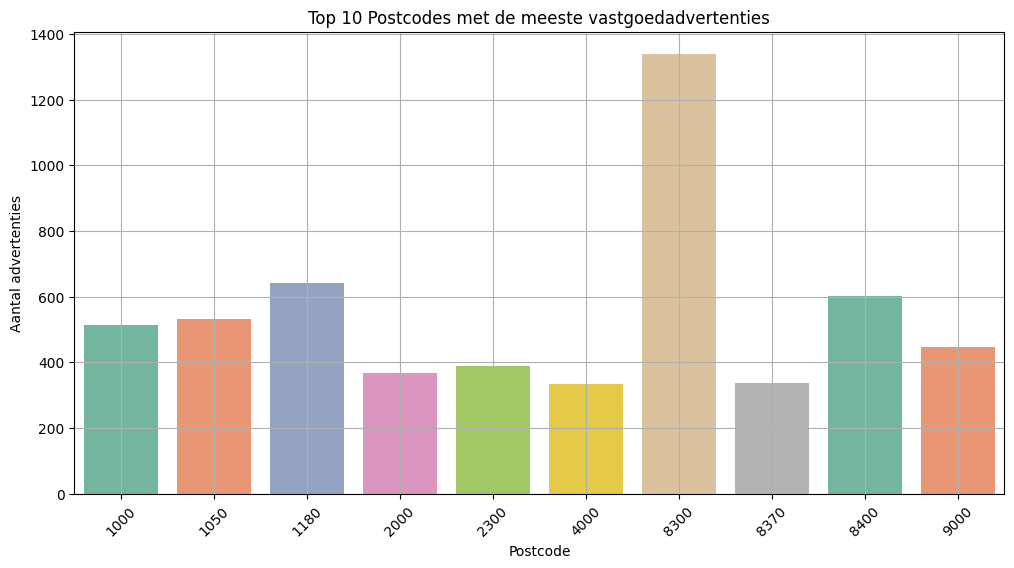

In [33]:

# مسیر فایل CSV
file_path = 'cleaned_file.csv'
df = pd.read_csv(file_path)

  
# گروه‌بندی بر اساس کد پستی و شمارش تعداد املاک
zip_counts = df['zip_code'].value_counts().reset_index()
zip_counts.columns = ['zip_code', 'count']
        
# انتخاب 10 کد پستی با بیشترین تعداد آگهی
top_10_zip_codes = zip_counts.head(10)
        
# رسم نمودار میله‌ای
plt.figure(figsize=(12, 6))
sns.barplot(x='zip_code', y='count', data=top_10_zip_codes, palette='Set2')
plt.title('Top 10 Postcodes met de meeste vastgoedadvertenties')
plt.xlabel('Postcode')
plt.ylabel('Aantal advertenties')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()



C:\Users\Behnaz\AppData\Local\Temp\ipykernel_14968\735810941.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='epc', y='count', data=epc_counts, palette='Reds_r')


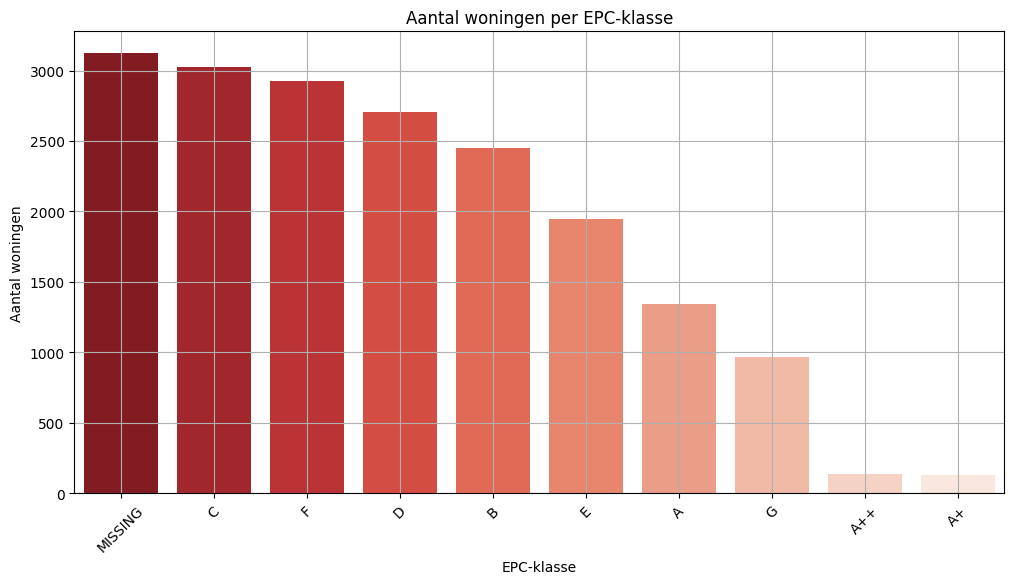

In [37]:
    
# فیلتر کردن فقط خانه‌ها (املاک با property_type برابر با 'HOUSE')
houses = df[df['property_type'] == 'HOUSE']
# گروه‌بندی بر اساس دسته‌بندی انرژی (epc) و شمارش تعداد خانه‌ها
epc_counts = houses['epc'].value_counts().reset_index()
epc_counts.columns = ['epc', 'count']
    
# رسم نمودار میله‌ای با Seaborn با رنگ‌های دلخواه
plt.figure(figsize=(12, 6))
sns.barplot(x='epc', y='count', data=epc_counts, palette='Reds_r')
plt.title('Aantal woningen per EPC-klasse')
plt.xlabel('EPC-klasse')
plt.ylabel('Aantal woningen')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
